In [72]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 95.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [74]:

# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

**Modelling in Tensorflow**

![Alt text](image.png)

In [75]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5


1/1 [==============================] - 0s 491ms/step - loss: 23.8814 - mae: 23.8814
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 23.0658 - mae: 23.0658
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 22.2501 - mae: 22.2501
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 21.4345 - mae: 21.4345
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 20.6189 - mae: 20.6189


In [76]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2., 95.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [77]:
model.predict([17.0])

1/1 [==============================] - 0s 69ms/step


array([[19.080133]], dtype=float32)

Improving our model 

In [78]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 231ms/step - loss: 25.0803 - mae: 25.0803
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 24.2647 - mae: 24.2647
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 23.4490 - mae: 23.4490
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 22.6334 - mae: 22.6334
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 21.8178 - mae: 21.8178
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 21.0022 - mae: 21.0022
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 20.1865 - mae: 20.1865
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 19.3709 - mae: 19.3709
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 18.5553 - mae: 18.5553
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 17.7397 - mae: 17.7397
Epoch 11/100
1/1 [==============================] - 0s 7m

In [79]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2., 95.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [80]:
model.predict([17.0])

1/1 [==============================] - 0s 120ms/step


array([[1.9471946]], dtype=float32)

After using Learning Rate and adding a hidden layer in the Model

In [81]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)    
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(lr=0.001),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 386ms/step - loss: 11.4351 - mae: 11.4351
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 16.2330 - mae: 16.2330
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.9483 - mae: 12.9483
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 13.2147 - mae: 13.2147
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 14.8138 - mae: 14.8138
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 11.7085 - mae: 11.7085
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 14.8616 - mae: 14.8616
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 13.5127 - mae: 13.5127
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7279 - mae: 11.7279
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 15.2612 - mae: 15.2612
Epoch 11/100
1/1 [==============================] - 0s 7m

In [82]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2., 95.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [83]:
model.predict([17.0])

1/1 [==============================] - 0s 85ms/step


array([[3.9477487]], dtype=float32)

**Evaluating a Model**

In [84]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [85]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

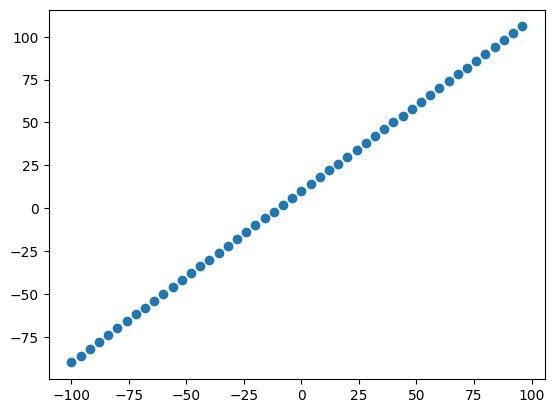

In [86]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

Spltting the data into training and testing sets

In [87]:
len(X),len(y)

(50, 50)

In [88]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

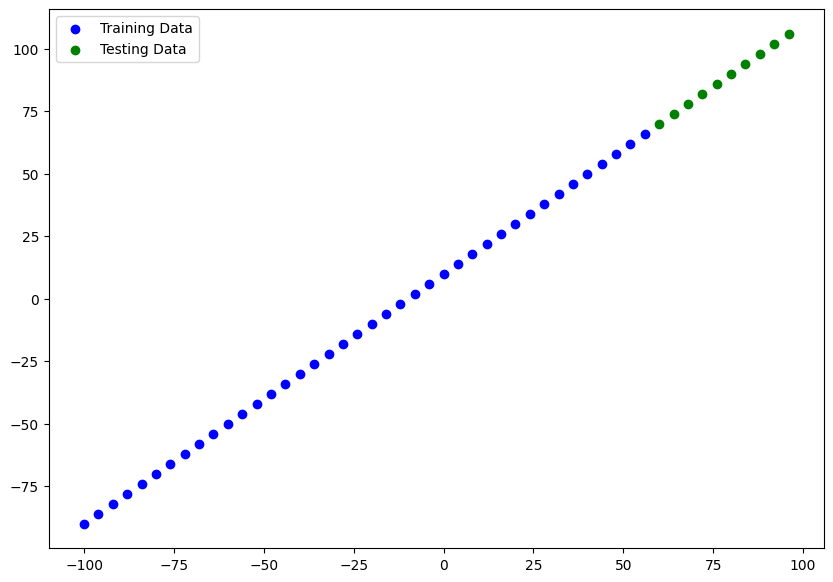

In [89]:
plt.figure(figsize=(10,7))

# For Training Dataset
plt.scatter(X_train,y_train,color = 'blue',label = 'Training Data')

# For Testing Dataset
plt.scatter(X_test,y_test,color = 'green',label = 'Testing Data')

plt.legend()

In [90]:
# Model for the Training and Testing datasets
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30,name="input_layer_1"),
    tf.keras.layers.Dense(10,name="input_layer_2"),
    tf.keras.layers.Dense(10,name="input_layer_3"),
    tf.keras.layers.Dense(10,name="input_layer_4"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
)

In [91]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

In [92]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_1 (Dense)       (None, 30)                60        
                                                                 
 input_layer_2 (Dense)       (None, 10)                310       
                                                                 
 input_layer_3 (Dense)       (None, 10)                110       
                                                                 
 input_layer_4 (Dense)       (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 601 (2.35 KB)
Trainable params: 601 (2.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Visualizing the predictions

In [93]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 85ms/step


In [94]:
y_pred

array([[0.36635834],
       [0.39421302],
       [0.4220677 ],
       [0.44992247],
       [0.4777772 ],
       [0.5056319 ],
       [0.5334867 ],
       [0.5613414 ],
       [0.58919597],
       [0.61705077]], dtype=float32)

In [95]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred):

    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();


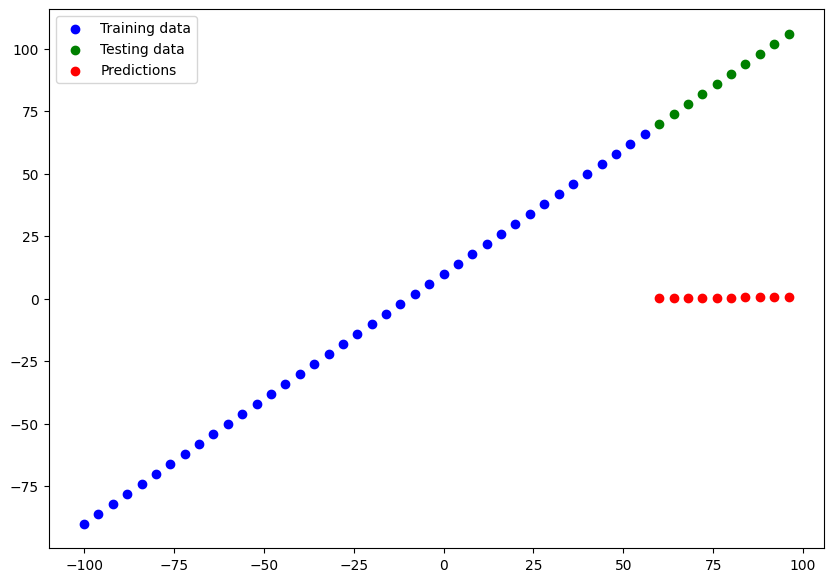

In [96]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

Evaluating the model

In [97]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 194ms/step - loss: 87.5083 - mae: 87.5083


[87.50829315185547, 87.50829315185547]

In [98]:
tf.constant(y_test)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [99]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.36635834],
       [0.39421302],
       [0.4220677 ],
       [0.44992247],
       [0.4777772 ],
       [0.5056319 ],
       [0.5334867 ],
       [0.5613414 ],
       [0.58919597],
       [0.61705077]], dtype=float32)>

In [100]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.36635834, 0.39421302, 0.4220677 , 0.44992247, 0.4777772 ,
       0.5056319 , 0.5334867 , 0.5613414 , 0.58919597, 0.61705077],
      dtype=float32)>

In [101]:
mae = tf.metrics.mean_absolute_error(y_true = y_test , y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=87.50829>

In [102]:
mse = tf.metrics.mean_squared_error(y_true = y_test , y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=7787.87>

In [103]:
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true = y_true , y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true = y_true , y_pred = tf.squeeze(y_pred))

Experimenting on Models using TensorFlow

In [104]:
# Model 1
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]) 

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train,axis = 1),y_train,epochs=100)

Epoch 1/100


2/2 [==============================] - 0s 12ms/step - loss: 40.2782 - mae: 40.2782
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.9405 - mae: 11.9405
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0938 - mae: 11.0938
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.3205 - mae: 9.3205
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1908 - mae: 10.1908
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4519 - mae: 9.4519
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5896 - mae: 8.5896
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0538 - mae: 9.0538
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.7841 - mae: 18.7841
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1383 - mae: 10.1383
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss: 8.4125

1/1 [==============================] - 0s 64ms/step


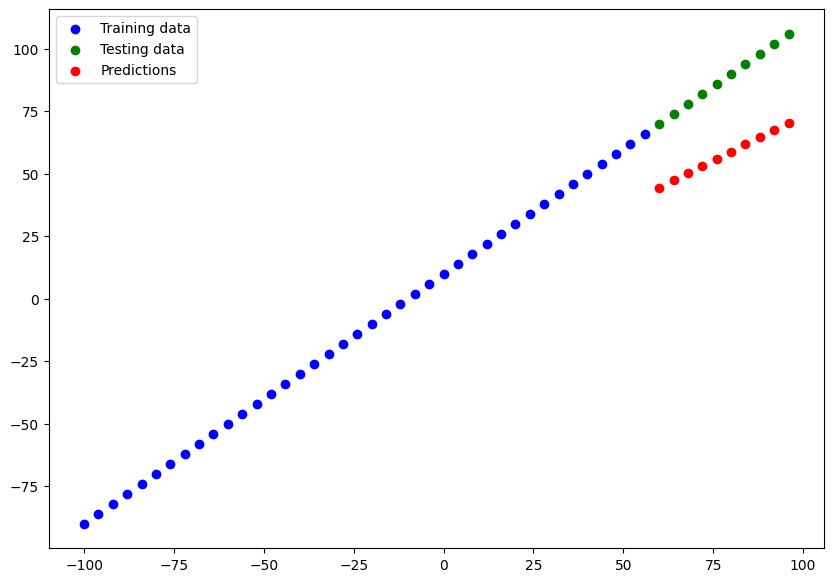

In [105]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [106]:
mae_1 = mae(X_test,y_pred_1)
mse_1 = mse(X_test,y_pred_1)

mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=20.581213>,
 <tf.Tensor: shape=(), dtype=float32, numpy=433.96768>)

In [107]:
# Model 2

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train,axis = 1),y_train,epochs=100)

Epoch 1/100


2/2 [==============================] - 1s 5ms/step - loss: 68.2385 - mae: 68.2385
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 38.4318 - mae: 38.4318
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 26.3645 - mae: 26.3645
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 13.4919 - mae: 13.4919
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 18.1014 - mae: 18.1014
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5852 - mae: 8.5852
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 12.3828 - mae: 12.3828
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0007 - mae: 11.0007
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 38.8564 - mae: 38.8564
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 26.4542 - mae: 26.4542
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 1

In [108]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

1/1 [==============================] - 0s 114ms/step


In [109]:
mae_2 = mae(X_test,y_pred_2)
mse_2 = mse(X_test,y_pred_2)

mae_2 , mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=19.84324>,
 <tf.Tensor: shape=(), dtype=float32, numpy=400.9>)

In [110]:
# Model 3

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train,axis = 1),y_train,epochs=500)

Epoch 1/500


2/2 [==============================] - 0s 6ms/step - loss: 36.9108 - mae: 36.9108
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 29.0751 - mae: 29.0751
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 32.6317 - mae: 32.6317
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 14.6248 - mae: 14.6248
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 20.8453 - mae: 20.8453
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 7.7043 - mae: 7.7043
Epoch 7/500
2/2 [==============================] - 0s 40ms/step - loss: 18.7829 - mae: 18.7829
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 15.1244 - mae: 15.1244
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 33.1537 - mae: 33.1537
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 9.2415 - mae: 9.2415
Epoch 11/500
2/2 [==============================] - 0s 7ms/step - loss: 1

1/1 [==============================] - 0s 69ms/step


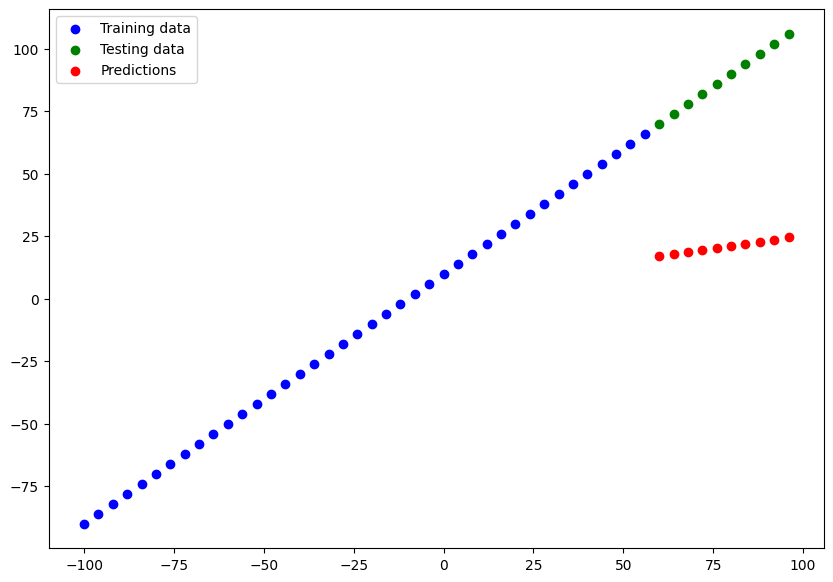

In [111]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [112]:
mae_3 = mae(X_test,y_pred_3)
mse_3 = mse(X_test,y_pred_3)

mae_3 , mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=57.24286>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3359.1672>)

In [113]:
import pandas as pd
model_results = [["model 1" , mae_1.numpy() , mse_1.numpy()],
                 ["model 2" , mae_2.numpy() , mse_2.numpy()],
                 ["model 3" , mae_3.numpy() , mse_3.numpy()]]
results = pd.DataFrame(model_results, columns = ["MODEL", "MAE", "MSE"])
results

MODEL        MAE          MSE
0  model 1  20.581213   433.967682
1  model 2  19.843241   400.899994
2  model 3  57.242859  3359.167236

In [114]:
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                20        
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Saving the Models

In [115]:
# Saving model using SavedModel format

model_1.save("model-1")

INFO:tensorflow:Assets written to: model-1\assets


INFO:tensorflow:Assets written to: model-1\assets


In [116]:
# Saving model using HDF5 format

model_1.save("Model-1.h5")

c:\Users\rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [117]:
# Loading the Models

load_model_1 = tf.keras.models.load_model("Model-1.h5")
load_model_1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Applying Neural Networks on real Dataset

In [118]:
import tensorflow as tf
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2.13.0


In [119]:
df = pd.read_csv('insurance.csv')

In [120]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [121]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [122]:
# One Hot Encoding using pandas dummies

df_1 = pd.get_dummies(df)
df_1

age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830           0         1          1   
1334   18  31.920         0   2205.98080           1         0          1   
1335   18  36.850         0   1629.83350           1         0          1   
1336   21  25.800         0   2007.94500           1         0          1   
1337   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0              1                 0                 0                 0   
1              0                 0                 0                 1   
2              0                 0                 0                 1   
3              0                 0                 1                 0   
4              0                 0                 1                 0   
...          ...               ...               ...               ...   
1333           0                 0                 1                 0   
1334           0                 1                 0                 0   
1335           0                 0                 0                 1   
1336           0                 0                 0                 0   
1337           1                 0                 1                 0   

      region_southwest  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1333                 0  
1334                 0  
1335                 0  
1336                 1  
1337                 0  

[1338 rows x 12 columns]

In [123]:
X = df_1.drop('charges',axis=1)
y = df_1['charges']

In [124]:
X.head()

age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0           1         0          0           1   
1   18  33.770         1           0         1          1           0   
2   28  33.000         3           0         1          1           0   
3   33  22.705         0           0         1          1           0   
4   32  28.880         0           0         1          1           0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0

In [125]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [126]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [127]:
# Training Model

# Model 1

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100)

Epoch 1/100


34/34 [==============================] - 1s 2ms/step - loss: 8558.9902 - mae: 8558.9902
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7884.4458 - mae: 7884.4458
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7573.8970 - mae: 7573.8970
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7646.1714 - mae: 7646.1714
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7658.7227 - mae: 7658.7227
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7562.5342 - mae: 7562.5342
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7517.5342 - mae: 7517.5342
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7788.6299 - mae: 7788.6299
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7583.8813 - mae: 7583.8813
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7718.3218 - mae: 7718.3218
Epoch 11/10

In [128]:
m1 = model.evaluate(X_test, y_test) 

9/9 [==============================] - 0s 2ms/step - loss: 8759.9404 - mae: 8759.9404


In [129]:
y_train.mean() , y_train.median()

(13346.089736364485, 9575.4421)

In [130]:
# Model 2

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model_2.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100)

Epoch 1/100


34/34 [==============================] - 1s 3ms/step - loss: 13359.5000 - mae: 13359.5000
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13347.6641 - mae: 13347.6641
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13334.9014 - mae: 13334.9014
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13320.5791 - mae: 13320.5791
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13304.3232 - mae: 13304.3232
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13285.6846 - mae: 13285.6846
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13264.4639 - mae: 13264.4639
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13240.4375 - mae: 13240.4375
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13213.4082 - mae: 13213.4082
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 13183.3740 - mae: 13

In [131]:
m2 = model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7560.6763 - mae: 7560.6763


In [132]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

history = model_3.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=200,verbose=0)

In [133]:
m3 = model_3.evaluate(X_test,y_test) 

9/9 [==============================] - 0s 2ms/step - loss: 3473.5535 - mae: 3473.5535


Text(0.5, 0, 'epochs')

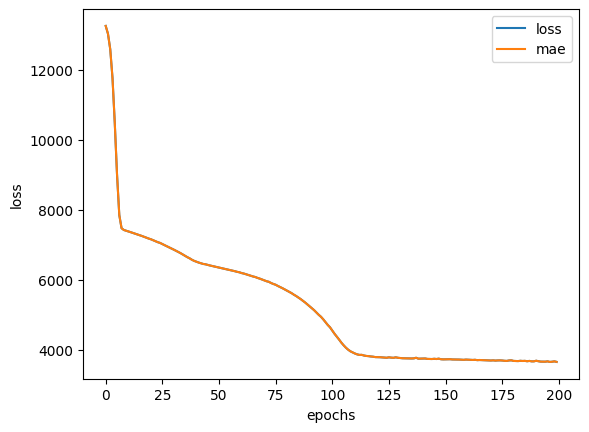

In [134]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Preprocessing Data (Normalization and Standardization)

In [149]:
insurance = pd.read_csv('D:\ZeroToMastery\TensorFlow\insurance.csv')
insurance.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [150]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [151]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [152]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [153]:
X_train.shape , X_train_normal.shape

((1070, 6), (1070, 11))

In [154]:
import tensorflow as tf

In [158]:
# Training Model

tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
model_4.fit(tf.expand_dims(X_train_normal,axis = -1), y_train, epochs=200, verbose=0) 

In [159]:
m4 = model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8630.9141 - mae: 8630.9141


**Evaluation of all Models**

The mae of the model 4 should be the lowest generally.

In [161]:
import pandas as pd
model_results = [["model 1" , m1 ],
                 ["model 2" , m2 ],
                 ["model 3" , m3 ],
                 ["model 4" , m4 ]]
results = pd.DataFrame(model_results, columns = ["MODEL", "Evaluation"])
results

MODEL                              Evaluation
0  model 1      [8759.9404296875, 8759.9404296875]
1  model 2    [7560.67626953125, 7560.67626953125]
2  model 3  [3473.553466796875, 3473.553466796875]
3  model 4            [8630.9140625, 8630.9140625]